<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/AI_ST7_W6_11_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Your set point:20
The value of sensor is: 36 degree of Celcius
Needed Pwm is: 200.20833333333357


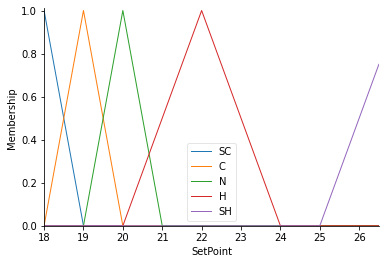

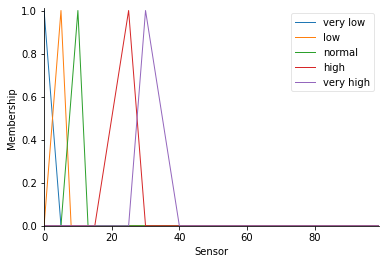

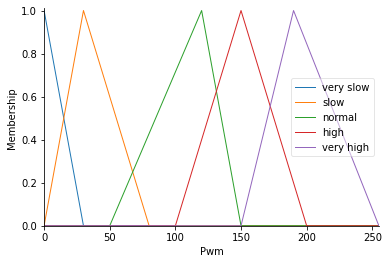

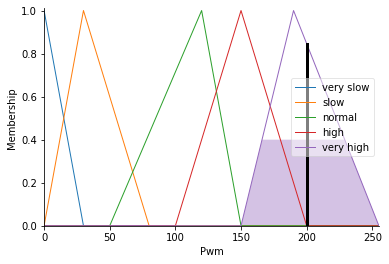

In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random


setpoint = ctrl.Antecedent(np.arange(18,27,0.5), 'SetPoint')
Value_sensor = ctrl.Antecedent(np.arange(0,100,1),'Sensor')
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')

setpoint['SC'] = fuzz.trimf(setpoint.universe,(18,18,19))
setpoint['C'] = fuzz.trimf(setpoint.universe,(18,19,20))
setpoint['N'] = fuzz.trimf(setpoint.universe,(19,20,21))
setpoint['H'] = fuzz.trimf(setpoint.universe,(20,22,24))
setpoint['SH'] = fuzz.trimf(setpoint.universe,(25,27,27))
setpoint.view()

Value_sensor['very low'] = fuzz.trimf(Value_sensor.universe,(0,0,5))
Value_sensor['low'] = fuzz.trimf(Value_sensor.universe,(0,5,8))
Value_sensor['normal'] = fuzz.trimf(Value_sensor.universe,(5,10,13))
Value_sensor['high'] = fuzz.trimf(Value_sensor.universe,(15,25,30))
Value_sensor['very high'] = fuzz.trimf(Value_sensor.universe,(25,30,40))
Value_sensor.view()

Pwm['very slow'] = fuzz.trimf(Pwm.universe,(0,0,30))
Pwm['slow'] = fuzz.trimf(Pwm.universe,(0,30,80))
Pwm['normal'] = fuzz.trimf(Pwm.universe,(50,120,150))
Pwm['high'] = fuzz.trimf(Pwm.universe,(100,150,200))
Pwm['very high'] = fuzz.trimf(Pwm.universe,(150,190,255))
Pwm.view()

rule1 = ctrl.Rule(setpoint['SC']&Value_sensor['very low'],Pwm['very slow'])
rule2 = ctrl.Rule(setpoint['SC']&Value_sensor['low'],Pwm['very slow'])
rule3 = ctrl.Rule(setpoint['SC']&Value_sensor['normal'],Pwm['slow'])
rule4 = ctrl.Rule(setpoint['SC']&Value_sensor['high'],Pwm['high'])
rule5 = ctrl.Rule(setpoint['SC']&Value_sensor['very high'],Pwm['very high'])

rule6 = ctrl.Rule(setpoint['C']&Value_sensor['very low'],Pwm['very slow'])
rule7 = ctrl.Rule(setpoint['C']&Value_sensor['low'],Pwm['very slow'])
rule8 = ctrl.Rule(setpoint['C']&Value_sensor['normal'],Pwm['slow'])
rule9 = ctrl.Rule(setpoint['C']&Value_sensor['high'],Pwm['high'])
rule10 = ctrl.Rule(setpoint['C']&Value_sensor['very high'],Pwm['very high'])

rule11 = ctrl.Rule(setpoint['N']&Value_sensor['very low'],Pwm['slow'])
rule12 = ctrl.Rule(setpoint['N']&Value_sensor['low'],Pwm['slow'])
rule13= ctrl.Rule(setpoint['N']&Value_sensor['normal'],Pwm['normal'])
rule14 = ctrl.Rule(setpoint['N']&Value_sensor['high'],Pwm['high'])
rule15 = ctrl.Rule(setpoint['N']&Value_sensor['very high'],Pwm['very high'])

rule16 = ctrl.Rule(setpoint['H']&Value_sensor['very low'],Pwm['slow'])
rule17 = ctrl.Rule(setpoint['H']&Value_sensor['low'],Pwm['normal'])
rule18 = ctrl.Rule(setpoint['H']&Value_sensor['normal'],Pwm['normal'])
rule19 = ctrl.Rule(setpoint['H']&Value_sensor['high'],Pwm['normal'])
rule20 = ctrl.Rule(setpoint['H']&Value_sensor['very high'],Pwm['high'])

rule21 = ctrl.Rule(setpoint['SH']&Value_sensor['very low'],Pwm['normal'])
rule22 = ctrl.Rule(setpoint['SH']&Value_sensor['low'],Pwm['normal'])
rule23 = ctrl.Rule(setpoint['SH']&Value_sensor['normal'],Pwm['slow'])
rule24 = ctrl.Rule(setpoint['SH']&Value_sensor['high'],Pwm['slow'])
rule25 = ctrl.Rule(setpoint['SH']&Value_sensor['very high'],Pwm['slow'])

tocdo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
tocdo= ctrl.ControlSystemSimulation(tocdo_ctrl)
a = input('Your set point:')
b = random.randrange(0,41,1)
#
tocdo.input['SetPoint'] = float(a)
tocdo.input['Sensor'] = b


tocdo.compute()
print('The value of sensor is:',b,'degree of Celcius')
print('Needed Pwm is:', tocdo.output['Pwm'])
Pwm.view(sim=tocdo)